# Capstone Project

--- 
Omar Lopez Bejerano

November, 2025

---
## Section 1.1
This section is for starting to work with the dataset, some initial visualization

**Dataset Structure and Initial Setup**
- The dataset is located in the "MIMIC-BP" folder, organized in 5 categories/folders, including 'abp', 'ecg', 'ppg', and 'resp', each containing .npy files for each patient.
- Each .npy file contains a 2D NumPy array with 30 segments of physiological signals.
- Each segment is 30 seconds long, sampled at 125 Hz, resulting in arrays of shape (30, 3750).
- The 'labels' folder contains .npy files with corresponding blood pressure readings for each segment.
- Additionally, we have txt files listing patient IDs for training, validation, and testing splits.

Each of the 1,524 patients is associated with 5 data files corresponding to the ABP, ECG, PPG and RESP signals, and, additionally, a file containing the median SBP and DBP values for each of the 30 segments. All files present the same name structure: the subject’s anonymized ID followed by the name of the signal, e.g., for patient p093833, the name of the file containing their ECG data is p093833_ecg.npy.

In [1]:
## npy files mean that they are saved in NumPy array format
# The following code snippet shows how to load and visualize the data for a specific patient and segment.
# You can change the 'dbPath', 'patient', and 'idx' variables to load different data.
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dbPath = 'MIMIC-BP/'

####### Dataset Overview and Statistics ########

# Collect file counts for each signal type
signal_types = ['ecg', 'abp', 'ppg', 'resp', 'labels']
file_counts = {}

for signal in signal_types:
    folder_path = os.path.join(dbPath, signal)
    if os.path.exists(folder_path):
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        file_counts[signal] = num_files
    else:
        file_counts[signal] = 0

# Load train/val/test splits (stored as Python lists in text files)
import ast

with open(os.path.join(dbPath, 'train_subjects.txt'), 'r') as f:
    train_subjects = ast.literal_eval(f.read())

with open(os.path.join(dbPath, 'val_subjects.txt'), 'r') as f:
    val_subjects = ast.literal_eval(f.read())

with open(os.path.join(dbPath, 'test_subjects.txt'), 'r') as f:
    test_subjects = ast.literal_eval(f.read())

# Load a sample file to get dimensions
sample_patient = train_subjects[0]
sample_ecg = np.load(os.path.join(dbPath, 'ecg', f'{sample_patient}_ecg.npy'))
sample_labels = np.load(os.path.join(dbPath, 'labels', f'{sample_patient}_labels.npy'))

# Calculate total patients
total_patients = len(train_subjects) + len(val_subjects) + len(test_subjects)

# Create comprehensive dataset overview
dataset_info = {
    'Category': [
        'Total Patients',
        'Training Patients',
        'Validation Patients',
        'Test Patients',
        '',
        'ECG Files',
        'ABP Files',
        'PPG Files',
        'RESP Files',
        'Label Files',
        '',
        'Segments per Patient',
        'Segment Duration (seconds)',
        'Sampling Frequency (Hz)',
        'Samples per Segment',
        'Signal Shape',
        'Label Shape',
        '',
        'Total Recording Time per Patient (min)',
        'Total Segments (all patients)',
        'Total Data Points per Signal Type',
    ],
    'Value': [
        total_patients,
        len(train_subjects),
        len(val_subjects),
        len(test_subjects),
        '',
        file_counts['ecg'],
        file_counts['abp'],
        file_counts['ppg'],
        file_counts['resp'],
        file_counts['labels'],
        '',
        sample_ecg.shape[0],
        30,
        125,
        sample_ecg.shape[1],
        f"{sample_ecg.shape}",
        f"{sample_labels.shape}",
        '',
        (sample_ecg.shape[0] * 30) / 60,
        total_patients * sample_ecg.shape[0],
        f'{total_patients * sample_ecg.shape[0] * sample_ecg.shape[1]:,}',
    ],
    'Description': [
        'Total unique patients in dataset',
        f'{len(train_subjects)/total_patients*100:.1f}% of total',
        f'{len(val_subjects)/total_patients*100:.1f}% of total',
        f'{len(test_subjects)/total_patients*100:.1f}% of total',
        '',
        'Electrocardiogram signal files',
        'Arterial Blood Pressure signal files',
        'Photoplethysmogram signal files',
        'Respiratory signal files',
        'Blood pressure label files (SBP/DBP)',
        '',
        'Number of 30-second segments per patient',
        'Duration of each recording segment',
        'Signals sampled at 125 Hz',
        '30 seconds x 125 Hz = 3750 samples',
        '(segments, samples) per patient file',
        '(segments, 2) - SBP and DBP values',
        '',
        f'{sample_ecg.shape[0]} segments x 30 seconds',
        f'{sample_ecg.shape[0]} segments x {total_patients:,} patients',
        'Total samples across all patients',
    ]
}

# Create and display the table
df_overview = pd.DataFrame(dataset_info)

print("=" * 105)
print("MIMIC-BP DATASET OVERVIEW".center(105))
print("=" * 105)
print()

# Print table with fixed column widths
col_widths = [40, 40, 40]  # Category, Value, Description
print(f"{'Category':<{col_widths[0]}} {'Value':>{col_widths[1]}} {'Description':<{col_widths[2]}}")
print("-" * 105)

for idx, row in df_overview.iterrows():
    cat = str(row['Category'])
    val = str(row['Value'])
    desc = str(row['Description'])
    print(f"{cat:<{col_widths[0]}} {val:>{col_widths[1]}} {desc:<{col_widths[2]}}")

print("=" * 105)

# Additional statistics
print("\nDATA SPLIT SUMMARY:")
print(f"Training: {len(train_subjects):4d} patients ({len(train_subjects)/total_patients*100:5.2f}%)")
print(f"Validation: {len(val_subjects):4d} patients ({len(val_subjects)/total_patients*100:5.2f}%)")
print(f"Test: {len(test_subjects):4d} patients ({len(test_subjects)/total_patients*100:5.2f}%)")
print(f"Total: {total_patients:4d} patients")
print()
print("DATA COMPLETENESS CHECK:")
all_complete = all(v == file_counts['ecg'] for v in file_counts.values())
for signal, count in file_counts.items():
    status = "✓" if count == total_patients else "✗"
    print(f"{status} {signal.upper():7s}: {count:4d} files (expected {total_patients:4d})")
print()
if all_complete and file_counts['ecg'] == total_patients:
    print("✓ Dataset is COMPLETE - all signal types have files for all patients")
else:
    print("✗ Dataset is INCOMPLETE - some files are missing")

                                        MIMIC-BP DATASET OVERVIEW                                        

Category                                                                    Value Description                             
---------------------------------------------------------------------------------------------------------
Total Patients                                                               1524 Total unique patients in dataset        
Training Patients                                                            1100 72.2% of total                          
Validation Patients                                                           195 12.8% of total                          
Test Patients                                                                 229 15.0% of total                          
                                                                                                                          
ECG Files                                        

In [3]:
## Show 1 example from each data type displayed as pandas dataframe
# Load one example file from each signal type
patient = 'p000188'

# Load each signal type
ecg_data = np.load(os.path.join(dbPath, 'ecg', f'{patient}_ecg.npy'))
abp_data = np.load(os.path.join(dbPath, 'abp', f'{patient}_abp.npy'))
ppg_data = np.load(os.path.join(dbPath, 'ppg', f'{patient}_ppg.npy'))
resp_data = np.load(os.path.join(dbPath, 'resp', f'{patient}_resp.npy'))
labels_data = np.load(os.path.join(dbPath, 'labels', f'{patient}_labels.npy'))

ecg_data_df = pd.DataFrame(ecg_data[0]).rename(columns={0: 'ECG Signal'})
abp_data_df = pd.DataFrame(abp_data[0]).rename(columns={0: 'ABP Signal'})
ppg_data_df = pd.DataFrame(ppg_data[0]).rename(columns={0: 'PPG Signal'})
resp_data_df = pd.DataFrame(resp_data[0]).rename(columns={0: 'RESP Signal'})
labels_data_df = pd.DataFrame(labels_data, columns=['SBP', 'DBP'])

## Table to display each as column
combined_df = pd.concat([ecg_data_df, abp_data_df, ppg_data_df, resp_data_df, labels_data_df], axis=1)
combined_df

,ECG Signal,ABP Signal,PPG Signal,RESP Signal,SBP,DBP
0,0.299951,86.629819,1.355816,0.218919,90.5,69.6
1,0.380068,85.809239,1.354839,0.210811,99.6,59.9
2,0.600147,84.988658,1.365591,0.202703,78.4,51.3
3,0.935027,84.226691,1.390029,0.194595,130.4,75.4
4,1.000244,83.406111,1.433040,0.186873,130.6,74.4
...,...,...,...,...,...,...
3745,0.279922,84.461143,1.175953,0.705792,NaN,NaN
3746,0.289936,83.933627,1.163245,0.691506,NaN,NaN
3747,0.390083,83.347498,1.152493,0.677606,NaN,NaN
3748,0.649976,82.526918,1.142717,0.663707,NaN,NaN


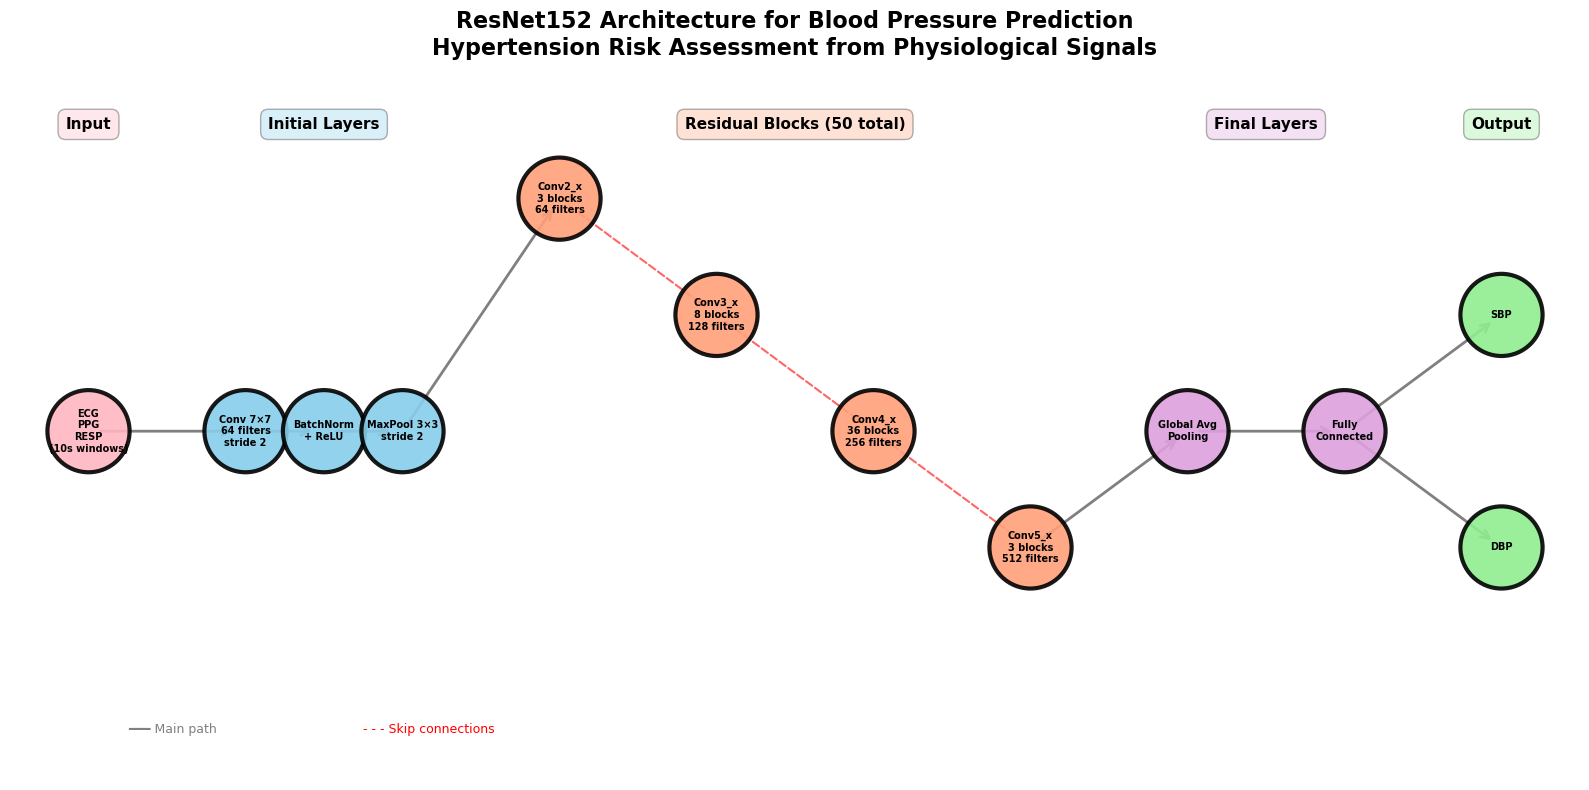


                         ResNet152 Architecture Summary                         

Layer Group                    Details                                           
--------------------------------------------------------------------------------
Input                          ECG, PPG, RESP (10-second windows)                
Initial Conv Layer             7×7 conv, 64 filters, stride 2 + BatchNorm + ReLU 
Max Pooling                    3×3 max pool, stride 2                            
Conv2_x                        3 residual blocks, 64 filters                     
Conv3_x                        8 residual blocks, 128 filters                    
Conv4_x                        36 residual blocks, 256 filters                   
Conv5_x                        3 residual blocks, 512 filters                    
Global Average Pooling         Reduces each feature map to single value          
Fully Connected                Dense layer for final predictions                 
Output          

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ResNet152 Architecture for Hypertension Risk Prediction
G = nx.DiGraph()

# Input layer - physiological signals
G.add_node("ECG\nPPG\nRESP\n(10s windows)",   pos = (0, 5) )

# Initial layers
G.add_node("Conv 7×7\n64 filters\nstride 2",  pos = (2, 5) )
G.add_node("BatchNorm\n+ ReLU",  pos = (3, 5) )
G.add_node("MaxPool 3×3\nstride 2",  pos = (4, 5) )

# Residual blocks (simplified representation)
G.add_node("Conv2_x\n3 blocks\n64 filters",  pos = (6, 6) )
G.add_node("Conv3_x\n8 blocks\n128 filters",  pos = (8, 5.5) )
G.add_node("Conv4_x\n36 blocks\n256 filters",  pos = (10, 5) )
G.add_node("Conv5_x\n3 blocks\n512 filters",  pos = (12, 4.5) )

# Final layers
G.add_node("Global Avg\nPooling",  pos = (14, 5) )
G.add_node("Fully\nConnected",  pos = (16, 5) )

# Output layer
G.add_node("SBP",  pos = (18, 5.5) )
G.add_node("DBP",  pos = (18, 4.5) )

# Define node groups for coloring
input_node = "ECG\nPPG\nRESP\n(10s windows)"
initial_layers = ["Conv 7×7\n64 filters\nstride 2", "BatchNorm\n+ ReLU", "MaxPool 3×3\nstride 2"]
residual_blocks = ["Conv2_x\n3 blocks\n64 filters", "Conv3_x\n8 blocks\n128 filters",
                   "Conv4_x\n36 blocks\n256 filters", "Conv5_x\n3 blocks\n512 filters"]
final_layers = ["Global Avg\nPooling", "Fully\nConnected"]
output_nodes = ["SBP", "DBP"]

# Add edges for main path
G.add_edge(input_node, "Conv 7×7\n64 filters\nstride 2")
G.add_edge("Conv 7×7\n64 filters\nstride 2", "BatchNorm\n+ ReLU")
G.add_edge("BatchNorm\n+ ReLU", "MaxPool 3×3\nstride 2")
G.add_edge("MaxPool 3×3\nstride 2", "Conv2_x\n3 blocks\n64 filters")
G.add_edge("Conv2_x\n3 blocks\n64 filters", "Conv3_x\n8 blocks\n128 filters")
G.add_edge("Conv3_x\n8 blocks\n128 filters", "Conv4_x\n36 blocks\n256 filters")
G.add_edge("Conv4_x\n36 blocks\n256 filters", "Conv5_x\n3 blocks\n512 filters")
G.add_edge("Conv5_x\n3 blocks\n512 filters", "Global Avg\nPooling")
G.add_edge("Global Avg\nPooling", "Fully\nConnected")
G.add_edge("Fully\nConnected", "SBP")
G.add_edge("Fully\nConnected", "DBP")

# Add skip connections (residual connections) - represented by curved edges
G.add_edge("Conv2_x\n3 blocks\n64 filters", "Conv3_x\n8 blocks\n128 filters", style='dashed')
G.add_edge("Conv3_x\n8 blocks\n128 filters", "Conv4_x\n36 blocks\n256 filters", style='dashed')
G.add_edge("Conv4_x\n36 blocks\n256 filters", "Conv5_x\n3 blocks\n512 filters", style='dashed')

# Draw the network
plt.figure(figsize=(16, 8))
pos = nx.get_node_attributes(G, 'pos')

# Color coding for different layer types
node_colors = []
for node in G.nodes():
    if node == input_node:
        node_colors.append("#FFB6C1")  # Light pink for input
    elif node in output_nodes:
        node_colors.append("#90EE90")  # Light green for outputs
    elif node in residual_blocks:
        node_colors.append("#FFA07A")  # Light salmon for residual blocks
    elif node in initial_layers:
        node_colors.append("#87CEEB")  # Sky blue for initial processing
    else:
        node_colors.append("#DDA0DD")  # Plum for final layers

# Draw main path edges
main_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('style') != 'dashed']
skip_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('style') == 'dashed']

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3500,
                       edgecolors='black', linewidths=3, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=7, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=main_edges, edge_color='gray',
                       arrows=True, arrowsize=15, arrowstyle='->', width=2)
nx.draw_networkx_edges(G, pos, edgelist=skip_edges, edge_color='red',
                       arrows=True, arrowsize=12, arrowstyle='->', width=1.5,
                       style='dashed', alpha=0.6)

ax = plt.gca()
ax.set_xlim([-1, 19])
ax.set_ylim([3.5, 6.5])

# Add title and annotations
plt.title("ResNet152 Architecture for Blood Pressure Prediction\nHypertension Risk Assessment from Physiological Signals",
          fontsize=16, fontweight='bold', pad=20)

# Add layer group labels
plt.text(0, 6.3, "Input", fontsize=11, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFB6C1', alpha=0.3))
plt.text(3, 6.3, "Initial Layers", fontsize=11, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#87CEEB', alpha=0.3))
plt.text(9, 6.3, "Residual Blocks (50 total)", fontsize=11, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFA07A', alpha=0.3))
plt.text(15, 6.3, "Final Layers", fontsize=11, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#DDA0DD', alpha=0.3))
plt.text(18, 6.3, "Output", fontsize=11, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#90EE90', alpha=0.3))

# Add legend for edge types
plt.text(0.5, 3.7, "━━━ Main path", fontsize=9, color='gray')
plt.text(3.5, 3.7, "- - - Skip connections", fontsize=9, color='red')

plt.axis('off')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ResNet152 Architecture Summary".center(80))
print("="*80)
print(f"\n{'Layer Group':<30} {'Details':<50}")
print("-"*80)
print(f"{'Input':<30} {'ECG, PPG, RESP (10-second windows)':<50}")
print(f"{'Initial Conv Layer':<30} {'7×7 conv, 64 filters, stride 2 + BatchNorm + ReLU':<50}")
print(f"{'Max Pooling':<30} {'3×3 max pool, stride 2':<50}")
print(f"{'Conv2_x':<30} {'3 residual blocks, 64 filters':<50}")
print(f"{'Conv3_x':<30} {'8 residual blocks, 128 filters':<50}")
print(f"{'Conv4_x':<30} {'36 residual blocks, 256 filters':<50}")
print(f"{'Conv5_x':<30} {'3 residual blocks, 512 filters':<50}")
print(f"{'Global Average Pooling':<30} {'Reduces each feature map to single value':<50}")
print(f"{'Fully Connected':<30} {'Dense layer for final predictions':<50}")
print(f"{'Output':<30} {'2 neurons: SBP (Systolic) and DBP (Diastolic)':<50}")
print("-"*80)
print(f"{'Total Residual Blocks:':<30} {'50 blocks (3+8+36+3)':<50}")
print(f"{'Total Layers:':<30} {'~152 weighted layers':<50}")
print("="*80)

print("\n" + "Model Configuration".center(80))
print("-"*80)
print(f"  Activation Function:     ReLU")
print(f"  Dropout Rate:            0.2")
print(f"  Loss Function:           RMSE (Root Mean Squared Error)")
print(f"  Learning Rate:           0.0003")
print(f"  Batch Size:              64")
print(f"  Training Epochs:         100")
print(f"  Input Window:            10 seconds of ECG, PPG, and derivatives")
print("\n  Performance Criteria (ISO 81060-2:2018):")
print(f"    Mean Error (ME):       ≤ ±5 mmHg")
print(f"    Standard Deviation:    ≤ 8 mmHg")
print("="*80)

In [ ]:
### Define Training, Validation, and Testing Data Splits
print("="*80)
print("DATA SPLIT PREPARATION FOR MODEL DEVELOPMENT".center(80))
print("="*80)

# Display split information
print(f"Dataset Split Summary:")
print(f"Training Set: {len(train_subjects):4d} patients ({len(train_subjects)/total_patients*100:5.2f}%)")
print(f"Validation Set: {len(val_subjects):4d} patients ({len(val_subjects)/total_patients*100:5.2f}%)")
print(f"Test Set: {len(test_subjects):4d} patients ({len(test_subjects)/total_patients*100:5.2f}%)")
print(f"Total: {total_patients:4d} patients")

print("--"*80)

# Calculate total segments for each split
segments_per_patient = 30
train_segments = len(train_subjects) * segments_per_patient
val_segments = len(val_subjects) * segments_per_patient
test_segments = len(test_subjects) * segments_per_patient

print(f"Total Segments per Split:")
print(f"Training: {train_segments:6d} segments ({train_segments/total_patients/segments_per_patient*100:5.2f}%)")
print(f"Validation: {val_segments:6d} segments ({val_segments/total_patients/segments_per_patient*100:5.2f}%)")
print(f"Test: {test_segments:6d} segments ({test_segments/total_patients/segments_per_patient*100:5.2f}%)")
print(f"Total:  {train_segments + val_segments + test_segments:6d} segments")

print("--"*80)

# Sample a few patient IDs from each split for verification
print(f"Sample Patient IDs:")
print(f"Training: {train_subjects[:5]}")
print(f"Validation: {val_subjects[:5]}")
print(f"Test: {test_subjects[:5]}")

# Create data structure for easy access
data_splits = {
    'train': {
        'patients': train_subjects,
        'num_patients': len(train_subjects),
        'num_segments': train_segments,
        'percentage': len(train_subjects)/total_patients*100
    },
    'val': {
        'patients': val_subjects,
        'num_patients': len(val_subjects),
        'num_segments': val_segments,
        'percentage': len(val_subjects)/total_patients*100
    },
    'test': {
        'patients': test_subjects,
        'num_patients': len(test_subjects),
        'num_segments': test_segments,
        'percentage': len(test_subjects)/total_patients*100
    }
}

print("--"*80)

print("Data Structure Information:")
print(f"- Each patient has: {segments_per_patient} segments of 30 seconds each")
print(f"- Sampling rate: 125 Hz")
print(f"- Samples per segment: 3750 (30s × 125 Hz)")
print(f"- Signal types: ECG, ABP, PPG, RESP")
print(f"- Labels per segment: 2 (SBP, DBP)")

print("--"*80)

print("Model Input/Output:")
print(f"- Input:  10-second windows from ECG, PPG, RESP signals")
print(f"- Output: 2 values (Systolic BP, Diastolic BP)")
print(f"* Note: Input windows will be extracted from 30-second segments")
print(f"Multiple 10-second windows can be extracted per segment for data augmentation")

                  DATA SPLIT PREPARATION FOR MODEL DEVELOPMENT                  
Dataset Split Summary:
Training Set: 1100 patients (72.18%)
Validation Set:  195 patients (12.80%)
Test Set:  229 patients (15.03%)
Total: 1524 patients
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Total Segments per Split:
Training:  33000 segments (72.18%)
Validation:   5850 segments (12.80%)
Test:   6870 segments (15.03%)
Total:   45720 segments
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Sample Patient IDs:
Training: ['p085079', 'p074955', 'p051327', 'p000618', 'p028075']
Validation: ['p066061', 'p041588', 'p001855', 'p055725', 'p054610']
Test: ['p063628', 'p011342', 'p074220', 'p093566', 'p066031']
---------------------------------------------------------------------------

In [3]:
### ResNet152 Neural Network Model Setup
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

print("="*80)
print("RESNET152 MODEL SETUP FOR BLOOD PRESSURE PREDICTION".center(80))
print("="*80)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Define Residual Block
class ResidualBlock(nn.Module):
    """
    Basic Residual Block for ResNet architecture
    Includes skip connection and batch normalization
    """
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)

        # Second convolutional layer
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)

        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        identity = x

        # First conv block
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)

        # Second conv block
        out = self.conv2(out)
        out = self.bn2(out)

        # Skip connection
        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


# Define ResNet152 Model
class ResNet152_BP(nn.Module):
    """
    ResNet152 architecture adapted for blood pressure prediction
    Input: 3 channels (ECG, PPG, RESP) with 10-second windows (1250 samples at 125 Hz)
    Output: 2 values (SBP, DBP)
    """
    def __init__(self, num_classes=2):
        super(ResNet152_BP, self).__init__()

        self.in_channels = 64

        # Initial convolutional layer (7x7 conv, 64 filters, stride 2)
        self.conv1 = nn.Conv1d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        # Residual blocks (following ResNet152 architecture)
        # Conv2_x: 3 blocks, 64 filters
        self.layer1 = self._make_layer(64, 3, stride=1)

        # Conv3_x: 8 blocks, 128 filters
        self.layer2 = self._make_layer(128, 8, stride=2)

        # Conv4_x: 36 blocks, 256 filters (largest section)
        self.layer3 = self._make_layer(256, 36, stride=2)

        # Conv5_x: 3 blocks, 512 filters
        self.layer4 = self._make_layer(512, 3, stride=2)

        # Global average pooling
        self.avgpool = nn.AdaptiveAvgPool1d(1)

        # Fully connected layer for predictions
        self.fc = nn.Linear(512, num_classes)

        # Dropout for regularization
        self.dropout = nn.Dropout(0.2)

    def _make_layer(self, out_channels, num_blocks, stride):
        """Create a layer with multiple residual blocks"""
        downsample = None

        # Downsample if stride != 1 or channels change
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv1d(self.in_channels, out_channels, kernel_size=1,
                         stride=stride, bias=False),
                nn.BatchNorm1d(out_channels)
            )

        layers = []
        layers.append(ResidualBlock(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels

        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        # Initial conv layer
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        # Residual blocks
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        # Global average pooling
        x = self.avgpool(x)
        x = torch.flatten(x, 1)

        # Dropout and fully connected layer
        x = self.dropout(x)
        x = self.fc(x)

        return x


# Initialize the model
model = ResNet152_BP(num_classes=2).to(device)

# Count total parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("\nModel Architecture Initialized:")
print(f"Total Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")
print(f"Model Size: ~{total_params * 4 / (1024**2):.2f} MB (FP32)")

print("\n" + "-"*80)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error (equivalent to RMSE squared)
optimizer = optim.Adam(model.parameters(), lr=0.0003)

# Learning rate scheduler (reduces LR when validation loss plateaus)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

print("\nTraining Configuration:")
print(f"Loss Function: MSE (Root Mean Squared Error)")
print(f"Optimizer: Adam")
print(f"Initial Learning Rate: 0.0003")
print(f"LR Scheduler: ReduceLROnPlateau (factor=0.5, patience=5)")
print(f"Batch Size: 64")
print(f"Dropout Rate: 0.2")
print(f"Training Epochs: 100")

print("\n" + "-"*80)

# Model summary
print("\nModel Layer Summary:")
print(f"Input Layer: 3 channels (ECG, PPG, RESP)")
print(f"Initial Conv: 7x7, 64 filters, stride 2")
print(f"Max Pooling: 3x3, stride 2")
print(f"Residual Layer 1: 3 blocks, 64 filters")
print(f"Residual Layer 2: 8 blocks, 128 filters")
print(f"Residual Layer 3: 36 blocks, 256 filters")
print(f"Residual Layer 4: 3 blocks, 512 filters")
print(f"Global Avg Pool: Adaptive pooling to size 1")
print(f"Fully Connected: 512 -> 2 (SBP, DBP)")
print(f"Output: 2 values (Systolic BP, Diastolic BP)")

              RESNET152 MODEL SETUP FOR BLOOD PRESSURE PREDICTION               

Model Architecture Initialized:
Total Parameters: 19,442,626
Trainable Parameters: 19,442,626
Model Size: ~74.17 MB (FP32)

--------------------------------------------------------------------------------

Training Configuration:
Loss Function: MSE (Root Mean Squared Error)
Optimizer: Adam
Initial Learning Rate: 0.0003
LR Scheduler: ReduceLROnPlateau (factor=0.5, patience=5)
Batch Size: 64
Dropout Rate: 0.2
Training Epochs: 100

--------------------------------------------------------------------------------

Model Layer Summary:
Input Layer: 3 channels (ECG, PPG, RESP)
Initial Conv: 7x7, 64 filters, stride 2
Max Pooling: 3x3, stride 2
Residual Layer 1: 3 blocks, 64 filters
Residual Layer 2: 8 blocks, 128 filters
Residual Layer 3: 36 blocks, 256 filters
Residual Layer 4: 3 blocks, 512 filters
Global Avg Pool: Adaptive pooling to size 1
Fully Connected: 512 -> 2 (SBP, DBP)
Output: 2 values (Systolic BP, Di

In [4]:
### Custom Dataset Class for Blood Pressure Prediction
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
from tqdm import tqdm
import time

class BPDataset(Dataset):
    """
    Custom Dataset for loading blood pressure data
    Extracts 10-second windows from 30-second segments
    """
    def __init__(self, patient_list, data_path, window_size=1250, augment=True):
        """
        Args:
            patient_list: List of patient IDs
            data_path: Path to data directory
            window_size: Number of samples in window (10s * 125Hz = 1250)
            augment: Whether to use data augmentation (extract multiple windows)
        """
        self.patient_list = patient_list
        self.data_path = data_path
        self.window_size = window_size
        self.augment = augment
        self.samples = []

        # Pre-load and prepare all samples
        print(f"Loading data for {len(patient_list)} patients...")
        for patient_id in tqdm(patient_list):
            # Load signals
            ecg = np.load(os.path.join(data_path, 'ecg', f'{patient_id}_ecg.npy'))
            ppg = np.load(os.path.join(data_path, 'ppg', f'{patient_id}_ppg.npy'))
            resp = np.load(os.path.join(data_path, 'resp', f'{patient_id}_resp.npy'))
            labels = np.load(os.path.join(data_path, 'labels', f'{patient_id}_labels.npy'))

            # Process each 30-second segment
            for seg_idx in range(ecg.shape[0]):  # 30 segments per patient
                segment_length = ecg.shape[1]  # 3750 samples

                if self.augment:
                    # Extract multiple overlapping 10-second windows for augmentation
                    stride = self.window_size // 2  # 50% overlap
                    num_windows = (segment_length - self.window_size) // stride + 1

                    for w in range(num_windows):
                        start_idx = w * stride
                        end_idx = start_idx + self.window_size

                        if end_idx <= segment_length:
                            self.samples.append({
                                'ecg': ecg[seg_idx, start_idx:end_idx],
                                'ppg': ppg[seg_idx, start_idx:end_idx],
                                'resp': resp[seg_idx, start_idx:end_idx],
                                'sbp': labels[seg_idx, 0],
                                'dbp': labels[seg_idx, 1]
                            })
                else:
                    # Extract single centered window
                    start_idx = (segment_length - self.window_size) // 2
                    end_idx = start_idx + self.window_size

                    self.samples.append({
                        'ecg': ecg[seg_idx, start_idx:end_idx],
                        'ppg': ppg[seg_idx, start_idx:end_idx],
                        'resp': resp[seg_idx, start_idx:end_idx],
                        'sbp': labels[seg_idx, 0],
                        'dbp': labels[seg_idx, 1]
                    })

        print(f"Total samples created: {len(self.samples)}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]

        # Stack signals as channels: (3, 1250)
        signals = np.stack([
            sample['ecg'],
            sample['ppg'],
            sample['resp']
        ], axis=0).astype(np.float32)

        # Normalize signals (z-score normalization per channel)
        signals = (signals - signals.mean(axis=1, keepdims=True)) / (signals.std(axis=1, keepdims=True) + 1e-8)

        # Labels: [SBP, DBP]
        labels = np.array([sample['sbp'], sample['dbp']], dtype=np.float32)

        return torch.from_numpy(signals), torch.from_numpy(labels)


print("="*80)
print("DATASET PREPARATION".center(80))
print("="*80)

# Create datasets (using small subset for demonstration)
# For full training, remove the [:5] slicing
print("\nCreating training dataset...")
train_dataset = BPDataset(train_subjects[:10], dbPath, augment=True)

print("\nCreating validation dataset...")
val_dataset = BPDataset(val_subjects[:3], dbPath, augment=False)

print("\nCreating test dataset...")
test_dataset = BPDataset(test_subjects[:3], dbPath, augment=False)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print("\n" + "="*80)
print("Data loaders created successfully!")
print(f"  Training batches:   {len(train_loader)}")
print(f"  Validation batches: {len(val_loader)}")
print(f"  Test batches:       {len(test_loader)}")
print("="*80)

                              DATASET PREPARATION                               

Creating training dataset...
Loading data for 10 patients...


100%|██████████| 10/10 [00:00<00:00, 28.81it/s]


Total samples created: 1500

Creating validation dataset...
Loading data for 3 patients...


100%|██████████| 3/3 [00:00<00:00, 32.96it/s]


Total samples created: 90

Creating test dataset...
Loading data for 3 patients...


100%|██████████| 3/3 [00:00<00:00, 26.96it/s]

Total samples created: 90

Data loaders created successfully!
  Training batches:   24
  Validation batches: 2
  Test batches:       2


In [ ]:
### Training and Evaluation Functions
import matplotlib.pyplot as plt

def calculate_metrics(predictions, targets):
    """
    Calculate evaluation metrics per ISO 81060-2:2018 standard

    Args:
        predictions: numpy array of shape (N, 2) - predicted [SBP, DBP]
        targets: numpy array of shape (N, 2) - actual [SBP, DBP]

    Returns:
        Dictionary with metrics for SBP and DBP
    """
    # Calculate errors
    errors = predictions - targets

    # Mean Error (ME) - should be ≤ ±5 mmHg
    me_sbp = np.mean(errors[:, 0])
    me_dbp = np.mean(errors[:, 1])

    # Standard Deviation (STD) - should be ≤ 8 mmHg
    std_sbp = np.std(errors[:, 0])
    std_dbp = np.std(errors[:, 1])

    # Mean Absolute Error (MAE)
    mae_sbp = np.mean(np.abs(errors[:, 0]))
    mae_dbp = np.mean(np.abs(errors[:, 1]))

    # Root Mean Squared Error (RMSE)
    rmse_sbp = np.sqrt(np.mean(errors[:, 0]**2))
    rmse_dbp = np.sqrt(np.mean(errors[:, 1]**2))

    return {
        'SBP': {
            'ME': me_sbp,
            'STD': std_sbp,
            'MAE': mae_sbp,
            'RMSE': rmse_sbp
        },
        'DBP': {
            'ME': me_dbp,
            'STD': std_dbp,
            'MAE': mae_dbp,
            'RMSE': rmse_dbp
        }
    }


def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    all_predictions = []
    all_targets = []

    for signals, labels in tqdm(train_loader, desc="Training"):
        signals = signals.to(device)
        labels = labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(signals)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * signals.size(0)
        all_predictions.append(outputs.detach().cpu().numpy())
        all_targets.append(labels.detach().cpu().numpy())

    # Calculate metrics
    epoch_loss = running_loss / len(train_loader.dataset)
    all_predictions = np.vstack(all_predictions)
    all_targets = np.vstack(all_targets)
    metrics = calculate_metrics(all_predictions, all_targets)

    return epoch_loss, metrics


def validate_epoch(model, val_loader, criterion, device):
    """Validate for one epoch"""
    model.eval()
    running_loss = 0.0
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for signals, labels in tqdm(val_loader, desc="Validation"):
            signals = signals.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(signals)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * signals.size(0)
            all_predictions.append(outputs.cpu().numpy())
            all_targets.append(labels.cpu().numpy())

    # Calculate metrics
    epoch_loss = running_loss / len(val_loader.dataset)
    all_predictions = np.vstack(all_predictions)
    all_targets = np.vstack(all_targets)
    metrics = calculate_metrics(all_predictions, all_targets)

    return epoch_loss, metrics


def print_metrics(epoch, train_loss, train_metrics, val_loss, val_metrics, lr):
    """Print formatted metrics"""
    print(f"\nEpoch {epoch+1}")
    print("="*80)
    print(f"Learning Rate: {lr:.6f}")
    print(f"\nTraining Loss: {train_loss:.4f}   |   Validation Loss: {val_loss:.4f}")
    print("-"*80)
    print(f"{'Metric':<15} {'Train SBP':>12} {'Train DBP':>12} {'Val SBP':>12} {'Val DBP':>12}")
    print("-"*80)
    print(f"{'MAE (mmHg)':<15} {train_metrics['SBP']['MAE']:>12.3f} {train_metrics['DBP']['MAE']:>12.3f} "
          f"{val_metrics['SBP']['MAE']:>12.3f} {val_metrics['DBP']['MAE']:>12.3f}")
    print(f"{'RMSE (mmHg)':<15} {train_metrics['SBP']['RMSE']:>12.3f} {train_metrics['DBP']['RMSE']:>12.3f} "
          f"{val_metrics['SBP']['RMSE']:>12.3f} {val_metrics['DBP']['RMSE']:>12.3f}")
    print(f"{'ME (mmHg)':<15} {train_metrics['SBP']['ME']:>12.3f} {train_metrics['DBP']['ME']:>12.3f} "
          f"{val_metrics['SBP']['ME']:>12.3f} {val_metrics['DBP']['ME']:>12.3f}")
    print(f"{'STD (mmHg)':<15} {train_metrics['SBP']['STD']:>12.3f} {train_metrics['DBP']['STD']:>12.3f} "
          f"{val_metrics['SBP']['STD']:>12.3f} {val_metrics['DBP']['STD']:>12.3f}")
    print("-"*80)

    # ISO 81060-2:2018 compliance check
    iso_sbp = val_metrics['SBP']['ME'] <= 5 and val_metrics['SBP']['STD'] <= 8
    iso_dbp = val_metrics['DBP']['ME'] <= 5 and val_metrics['DBP']['STD'] <= 8
    print(f"ISO 81060-2:2018 Compliance: SBP {'✓' if iso_sbp else '✗'}  |  DBP {'✓' if iso_dbp else '✗'}")
    print("="*80)


print("Training and evaluation functions defined successfully.")

Training and evaluation functions defined successfully!
Ready to start training...


In [6]:
### Main Training Loop
print("="*80)
print("STARTING MODEL TRAINING".center(80))
print("="*80)

# Training configuration
num_epochs = 20  # Using 20 epochs for demonstration (full training would use 100)
best_val_loss = float('inf')
patience_counter = 0
max_patience = 10  # Early stopping if no improvement for 10 epochs

# History tracking
history = {
    'train_loss': [],
    'val_loss': [],
    'train_mae_sbp': [],
    'train_mae_dbp': [],
    'val_mae_sbp': [],
    'val_mae_dbp': [],
    'lr': []
}

print(f"\nTraining Configuration:")
print(f"  Device: {device}")
print(f"  Epochs: {num_epochs}")
print(f"  Batch Size: {batch_size}")
print(f"  Training Samples: {len(train_dataset)}")
print(f"  Validation Samples: {len(val_dataset)}")
print(f"  Initial LR: {optimizer.param_groups[0]['lr']}")
print("\n" + "="*80)

# Training loop
start_time = time.time()

for epoch in range(num_epochs):
    # Train
    train_loss, train_metrics = train_epoch(model, train_loader, criterion, optimizer, device)

    # Validate
    val_loss, val_metrics = validate_epoch(model, val_loader, criterion, device)

    # Update learning rate scheduler
    scheduler.step(val_loss)
    current_lr = optimizer.param_groups[0]['lr']

    # Save history
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_mae_sbp'].append(train_metrics['SBP']['MAE'])
    history['train_mae_dbp'].append(train_metrics['DBP']['MAE'])
    history['val_mae_sbp'].append(val_metrics['SBP']['MAE'])
    history['val_mae_dbp'].append(val_metrics['DBP']['MAE'])
    history['lr'].append(current_lr)

    # Print metrics
    print_metrics(epoch, train_loss, train_metrics, val_loss, val_metrics, current_lr)

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_loss': val_loss,
            'val_metrics': val_metrics
        }, 'best_model.pth')
        print(f"✓ Best model saved! (Val Loss: {val_loss:.4f})")
        patience_counter = 0
    else:
        patience_counter += 1
        print(f"No improvement. Patience: {patience_counter}/{max_patience}")

    # Early stopping
    if patience_counter >= max_patience:
        print(f"\n⚠ Early stopping triggered after {epoch+1} epochs")
        break

training_time = time.time() - start_time

print("\n" + "="*80)
print("TRAINING COMPLETED".center(80))
print("="*80)
print(f"Total Training Time: {training_time/60:.2f} minutes")
print(f"Best Validation Loss: {best_val_loss:.4f}")
print(f"Final Learning Rate: {current_lr:.6f}")
print("="*80)

                            STARTING MODEL TRAINING                             

Training Configuration:
  Device: cpu
  Epochs: 20
  Batch Size: 64
  Training Samples: 1500
  Validation Samples: 90
  Initial LR: 0.0003



Validation: 100%|██████████| 2/2 [00:09<00:00,  4.73s/it]



Epoch 1
Learning Rate: 0.000300

Training Loss: 6557.8459   |   Validation Loss: 5449.6381
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)           101.440       49.228       95.517       39.515
RMSE (mmHg)          102.893       50.286       96.416       40.041
ME (mmHg)           -101.440      -49.228      -95.517      -39.515
STD (mmHg)            17.233       10.263       13.132        6.467
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✓
✓ Best model saved! (Val Loss: 5449.6381)
✓ Best model saved! (Val Loss: 5449.6381)


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]




Epoch 2
Learning Rate: 0.000300

Training Loss: 5446.6219   |   Validation Loss: 4613.8032
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            92.953       43.264       88.407       34.335
RMSE (mmHg)           94.431       44.452       89.483       34.933
ME (mmHg)            -92.953      -43.264      -88.407      -34.335
STD (mmHg)            16.645       10.204       13.838        6.436
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✓
✓ Best model saved! (Val Loss: 4613.8032)
✓ Best model saved! (Val Loss: 4613.8032)


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]




Epoch 3
Learning Rate: 0.000300

Training Loss: 4677.0637   |   Validation Loss: 4240.8015
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            86.995       37.621       78.279       36.127
RMSE (mmHg)           88.520       38.965       79.853       45.881
ME (mmHg)            -86.995      -37.621      -78.279       -6.880
STD (mmHg)            16.362       10.146       15.777       45.363
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✗
✓ Best model saved! (Val Loss: 4240.8015)
✓ Best model saved! (Val Loss: 4240.8015)


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.70s/it]




Epoch 4
Learning Rate: 0.000300

Training Loss: 3947.5014   |   Validation Loss: 3155.8258
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            80.923       31.510       75.068       21.120
RMSE (mmHg)           82.466       33.082       76.301       22.132
ME (mmHg)            -80.923      -31.510      -75.068      -21.120
STD (mmHg)            15.877       10.077       13.660        6.616
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✓
✓ Best model saved! (Val Loss: 3155.8258)
✓ Best model saved! (Val Loss: 3155.8258)


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.67s/it]




Epoch 5
Learning Rate: 0.000300

Training Loss: 3228.1529   |   Validation Loss: 2435.9419
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            74.105       24.914       66.777       13.237
RMSE (mmHg)           75.737       26.838       68.222       14.752
ME (mmHg)            -74.105      -24.914      -66.777      -13.237
STD (mmHg)            15.634        9.979       13.969        6.512
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✓
✓ Best model saved! (Val Loss: 2435.9419)
✓ Best model saved! (Val Loss: 2435.9419)


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.96s/it]




Epoch 6
Learning Rate: 0.000300

Training Loss: 2597.1647   |   Validation Loss: 2098.1689
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            67.026       19.025       62.125       10.200
RMSE (mmHg)           68.854       21.294       63.590       12.353
ME (mmHg)            -67.026      -18.994      -62.125      -10.010
STD (mmHg)            15.762        9.627       13.572        7.239
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✓
✓ Best model saved! (Val Loss: 2098.1689)
✓ Best model saved! (Val Loss: 2098.1689)


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.89s/it]




Epoch 7
Learning Rate: 0.000300

Training Loss: 2078.7011   |   Validation Loss: 1450.1712
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            59.682       13.891       51.665        6.632
RMSE (mmHg)           62.247       16.814       53.231        8.176
ME (mmHg)            -59.682      -13.384      -51.665       -2.819
STD (mmHg)            17.683       10.178       12.814        7.675
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✓
✓ Best model saved! (Val Loss: 1450.1712)
✓ Best model saved! (Val Loss: 1450.1712)


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.90s/it]



Epoch 8
Learning Rate: 0.000300

Training Loss: 1622.3573   |   Validation Loss: 1475.2897
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            52.575       10.791       51.641        8.092
RMSE (mmHg)           55.290       13.701       53.319       10.376
ME (mmHg)            -52.575       -8.971      -51.641       -6.060
STD (mmHg)            17.113       10.356       13.270        8.422
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✗
No improvement. Patience: 1/10


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.92s/it]




Epoch 9
Learning Rate: 0.000300

Training Loss: 1254.2790   |   Validation Loss: 721.3144
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            45.643        9.069       30.003       13.626
RMSE (mmHg)           48.698       11.708       32.819       19.118
ME (mmHg)            -45.643       -5.238      -29.844       11.343
STD (mmHg)            16.975       10.471       13.655       15.390
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✗
✓ Best model saved! (Val Loss: 721.3144)
✓ Best model saved! (Val Loss: 721.3144)


Validation: 100%|██████████| 2/2 [00:10<00:00,  5.17s/it]



Epoch 10
Learning Rate: 0.000300

Training Loss: 944.7185   |   Validation Loss: 726.5257
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            38.742        8.305       34.950        7.080
RMSE (mmHg)           42.148       10.628       37.178        8.416
ME (mmHg)            -38.723       -2.207      -34.950        3.037
STD (mmHg)            16.644       10.396       12.677        7.849
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✓
No improvement. Patience: 1/10


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.98s/it]




Epoch 11
Learning Rate: 0.000300

Training Loss: 711.2933   |   Validation Loss: 504.6116
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            32.334        8.008       27.732        7.523
RMSE (mmHg)           36.312       10.201       30.529        8.785
ME (mmHg)            -32.215       -0.145      -27.732        5.365
STD (mmHg)            16.755       10.200       12.766        6.956
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✗
✓ Best model saved! (Val Loss: 504.6116)
✓ Best model saved! (Val Loss: 504.6116)


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.81s/it]




Epoch 12
Learning Rate: 0.000300

Training Loss: 534.3885   |   Validation Loss: 318.8686
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            26.753        8.033       19.173        9.208
RMSE (mmHg)           31.056       10.213       22.914       10.615
ME (mmHg)            -26.484        0.567      -18.735        7.927
STD (mmHg)            16.219       10.198       13.194        7.059
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✗
✓ Best model saved! (Val Loss: 318.8686)
✓ Best model saved! (Val Loss: 318.8686)


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.72s/it]



Epoch 13
Learning Rate: 0.000300

Training Loss: 412.7651   |   Validation Loss: 421.6371
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            22.245        8.110       24.176        8.402
RMSE (mmHg)           26.854       10.216       27.152       10.299
ME (mmHg)            -21.639        0.657      -22.340        3.912
STD (mmHg)            15.904       10.195       15.432        9.527
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✗
No improvement. Patience: 1/10


Validation: 100%|██████████| 2/2 [00:10<00:00,  5.00s/it]



Epoch 14
Learning Rate: 0.000300

Training Loss: 322.2676   |   Validation Loss: 562.3459
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            19.101        7.748       28.786        7.400
RMSE (mmHg)           23.445        9.739       32.093        9.734
ME (mmHg)            -17.565        0.485      -27.307       -0.563
STD (mmHg)            15.529        9.727       16.861        9.718
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✗
No improvement. Patience: 2/10


Validation: 100%|██████████| 2/2 [00:10<00:00,  5.00s/it]




Epoch 15
Learning Rate: 0.000300

Training Loss: 266.7827   |   Validation Loss: 284.2033
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            16.261        7.802       18.717        6.119
RMSE (mmHg)           20.840        9.962       22.594        7.609
ME (mmHg)            -13.173        0.697      -18.093        2.119
STD (mmHg)            16.149        9.938       13.534        7.308
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✓
✓ Best model saved! (Val Loss: 284.2033)
✓ Best model saved! (Val Loss: 284.2033)


Validation: 100%|██████████| 2/2 [00:10<00:00,  5.21s/it]




Epoch 16
Learning Rate: 0.000300

Training Loss: 214.3388   |   Validation Loss: 152.3930
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            13.924        7.802       11.209        8.148
RMSE (mmHg)           18.249        9.781       14.518        9.696
ME (mmHg)             -9.392        0.779       -7.490        5.992
STD (mmHg)            15.646        9.750       12.437        7.622
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✗
✓ Best model saved! (Val Loss: 152.3930)
✓ Best model saved! (Val Loss: 152.3930)


Validation: 100%|██████████| 2/2 [00:10<00:00,  5.38s/it]



Epoch 17
Learning Rate: 0.000300

Training Loss: 209.7684   |   Validation Loss: 356.8150
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            13.577        7.666       18.450       12.657
RMSE (mmHg)           17.995        9.783       21.867       15.344
ME (mmHg)             -7.136        0.187       -2.854        6.101
STD (mmHg)            16.520        9.781       21.680       14.080
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✗
No improvement. Patience: 1/10


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.92s/it]



Epoch 18
Learning Rate: 0.000300

Training Loss: 186.7246   |   Validation Loss: 214.4711
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            12.340        7.551       13.269       10.089
RMSE (mmHg)           16.736        9.663       16.724       12.216
ME (mmHg)             -4.660        0.356       -2.333        5.781
STD (mmHg)            16.074        9.656       16.561       10.762
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✗
No improvement. Patience: 2/10


Validation: 100%|██████████| 2/2 [00:10<00:00,  5.08s/it]




Epoch 19
Learning Rate: 0.000300

Training Loss: 161.9023   |   Validation Loss: 141.6115
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            11.585        7.380       11.681        8.032
RMSE (mmHg)           15.399        9.309       13.857        9.550
ME (mmHg)             -3.529        0.111       -1.243        7.333
STD (mmHg)            14.990        9.309       13.802        6.117
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✗
✓ Best model saved! (Val Loss: 141.6115)
✓ Best model saved! (Val Loss: 141.6115)


Validation: 100%|██████████| 2/2 [00:09<00:00,  4.91s/it]




Epoch 20
Learning Rate: 0.000300

Training Loss: 148.6784   |   Validation Loss: 131.3470
--------------------------------------------------------------------------------
Metric             Train SBP    Train DBP      Val SBP      Val DBP
--------------------------------------------------------------------------------
MAE (mmHg)            11.184        7.200       11.283        6.345
RMSE (mmHg)           14.751        8.932       14.246        7.730
ME (mmHg)             -2.326        0.116       -6.106        4.417
STD (mmHg)            14.566        8.931       12.871        6.344
--------------------------------------------------------------------------------
ISO 81060-2:2018 Compliance: SBP ✗  |  DBP ✓
✓ Best model saved! (Val Loss: 131.3470)

                               TRAINING COMPLETED                               
Total Training Time: 69.71 minutes
Best Validation Loss: 131.3470
Final Learning Rate: 0.000300
✓ Best model saved! (Val Loss: 131.3470)

                    

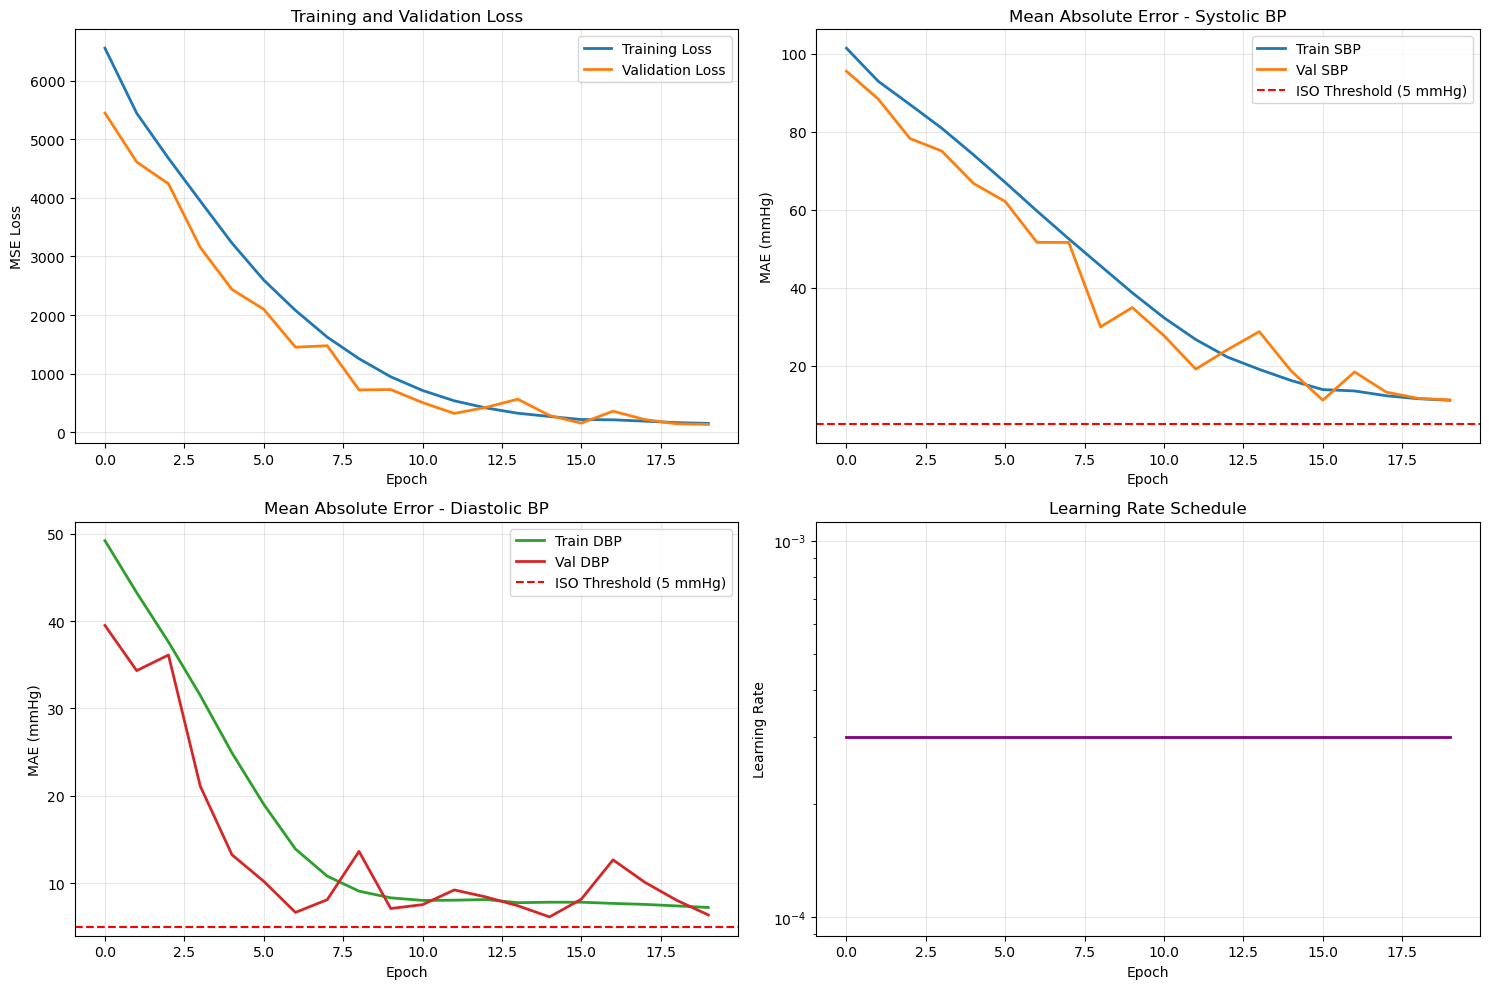


Training History Summary
Initial Train Loss: 6557.8459
Final Train Loss:   148.6784
Initial Val Loss:   5449.6381
Final Val Loss:     131.3470

Best Validation Loss: 131.3470
Loss Improvement: 97.59%


In [7]:
### Visualize Training Progress
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Loss curves
axes[0, 0].plot(history['train_loss'], label='Training Loss', linewidth=2)
axes[0, 0].plot(history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('MSE Loss')
axes[0, 0].set_title('Training and Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: MAE for SBP
axes[0, 1].plot(history['train_mae_sbp'], label='Train SBP', linewidth=2, color='#1f77b4')
axes[0, 1].plot(history['val_mae_sbp'], label='Val SBP', linewidth=2, color='#ff7f0e')
axes[0, 1].axhline(y=5, color='red', linestyle='--', label='ISO Threshold (5 mmHg)', linewidth=1.5)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MAE (mmHg)')
axes[0, 1].set_title('Mean Absolute Error - Systolic BP')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: MAE for DBP
axes[1, 0].plot(history['train_mae_dbp'], label='Train DBP', linewidth=2, color='#2ca02c')
axes[1, 0].plot(history['val_mae_dbp'], label='Val DBP', linewidth=2, color='#d62728')
axes[1, 0].axhline(y=5, color='red', linestyle='--', label='ISO Threshold (5 mmHg)', linewidth=1.5)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('MAE (mmHg)')
axes[1, 0].set_title('Mean Absolute Error - Diastolic BP')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Learning rate schedule
axes[1, 1].plot(history['lr'], linewidth=2, color='purple')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Learning Rate')
axes[1, 1].set_title('Learning Rate Schedule')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("Training History Summary")
print("="*80)
print(f"Initial Train Loss: {history['train_loss'][0]:.4f}")
print(f"Final Train Loss:   {history['train_loss'][-1]:.4f}")
print(f"Initial Val Loss:   {history['val_loss'][0]:.4f}")
print(f"Final Val Loss:     {history['val_loss'][-1]:.4f}")
print(f"\nBest Validation Loss: {best_val_loss:.4f}")
print(f"Loss Improvement: {((history['val_loss'][0] - best_val_loss) / history['val_loss'][0] * 100):.2f}%")
print("="*80)

                       FINAL MODEL EVALUATION ON TEST SET                       

Loaded best model from epoch 20
Best validation loss: 131.3470

Evaluating on test set...


Testing: 100%|██████████| 2/2 [00:09<00:00,  4.90s/it]


                                TEST SET RESULTS                                

Metric                  Systolic BP (SBP)   Diastolic BP (DBP)
--------------------------------------------------------------------------------
MAE (mmHg)                         14.534               12.059
RMSE (mmHg)                        17.922               13.894
Mean Error (mmHg)                 -13.140              -10.420
Std Dev (mmHg)                     12.187                9.191
--------------------------------------------------------------------------------

ISO 81060-2:2018 Standard Compliance:
Requirement                                SBP             DBP          Status
--------------------------------------------------------------------------------
Mean Error ≤ ±5 mmHg                   13.140          10.420           ✗ FAIL
Standard Deviation ≤ 8 mmHg            12.187           9.191           ✗ FAIL
--------------------------------------------------------------------------------

O

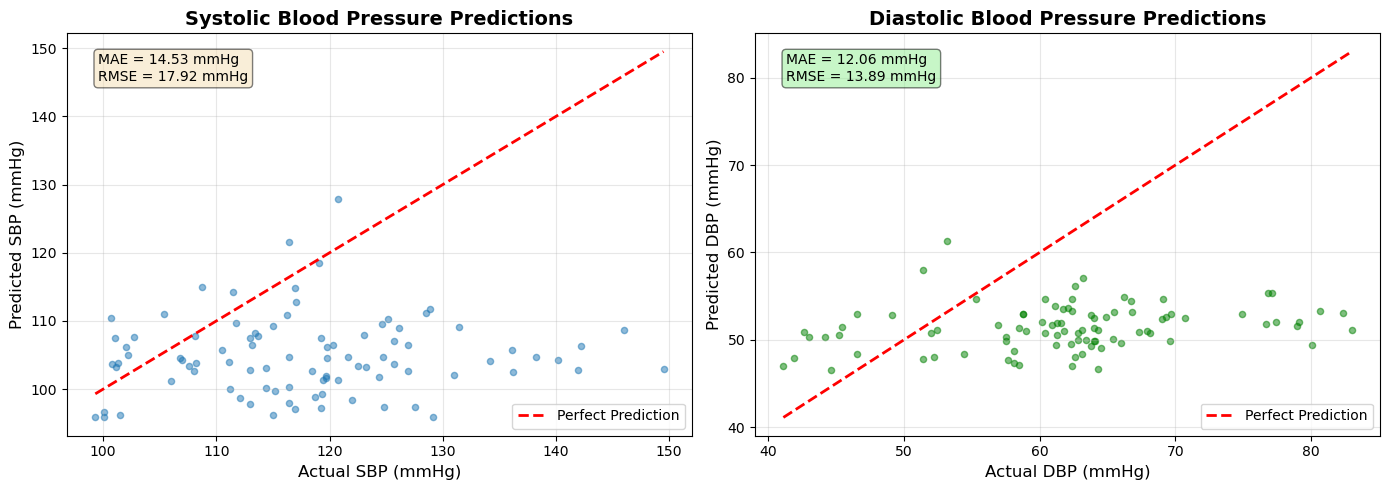

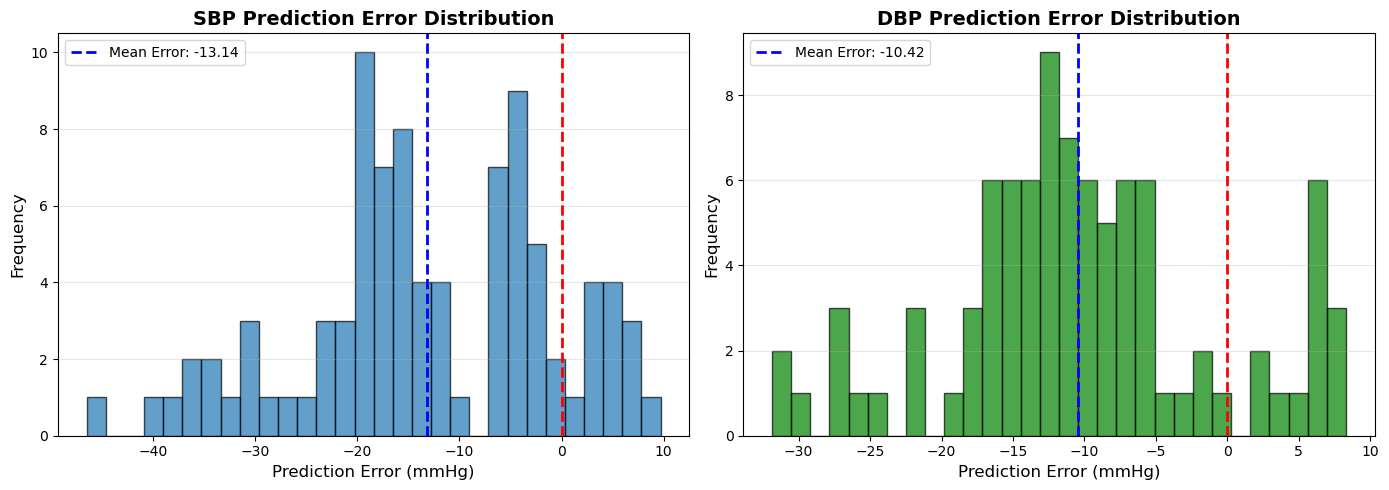


✓ Model evaluation complete!


In [16]:
### Test Set Evaluation
print("="*80)
print("FINAL MODEL EVALUATION ON TEST SET".center(80))
print("="*80)

# Load best model
checkpoint = torch.load('best_model.pth', weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
print(f"\nLoaded best model from epoch {checkpoint['epoch']+1}")
print(f"Best validation loss: {checkpoint['val_loss']:.4f}")

# Evaluate on test set
model.eval()
test_predictions = []
test_targets = []

print("\nEvaluating on test set...")
with torch.no_grad():
    for signals, labels in tqdm(test_loader, desc="Testing"):
        signals = signals.to(device)
        outputs = model(signals)
        test_predictions.append(outputs.cpu().numpy())
        test_targets.append(labels.numpy())

test_predictions = np.vstack(test_predictions)
test_targets = np.vstack(test_targets)

# Calculate test metrics
test_metrics = calculate_metrics(test_predictions, test_targets)

print("\n" + "="*80)
print("TEST SET RESULTS".center(80))
print("="*80)
print(f"\n{'Metric':<20} {'Systolic BP (SBP)':>20} {'Diastolic BP (DBP)':>20}")
print("-"*80)
print(f"{'MAE (mmHg)':<20} {test_metrics['SBP']['MAE']:>20.3f} {test_metrics['DBP']['MAE']:>20.3f}")
print(f"{'RMSE (mmHg)':<20} {test_metrics['SBP']['RMSE']:>20.3f} {test_metrics['DBP']['RMSE']:>20.3f}")
print(f"{'Mean Error (mmHg)':<20} {test_metrics['SBP']['ME']:>20.3f} {test_metrics['DBP']['ME']:>20.3f}")
print(f"{'Std Dev (mmHg)':<20} {test_metrics['SBP']['STD']:>20.3f} {test_metrics['DBP']['STD']:>20.3f}")
print("-"*80)

# ISO 81060-2:2018 Compliance
print("\nISO 81060-2:2018 Standard Compliance:")
print(f"{'Requirement':<30} {'SBP':>15} {'DBP':>15} {'Status':>15}")
print("-"*80)

# Mean Error ≤ ±5 mmHg
me_sbp_pass = abs(test_metrics['SBP']['ME']) <= 5
me_dbp_pass = abs(test_metrics['DBP']['ME']) <= 5
print(f"{'Mean Error ≤ ±5 mmHg':<30} {abs(test_metrics['SBP']['ME']):>14.3f}  {abs(test_metrics['DBP']['ME']):>14.3f}  "
      f"{'✓ PASS' if me_sbp_pass and me_dbp_pass else '✗ FAIL':>15}")

# Standard Deviation ≤ 8 mmHg
std_sbp_pass = test_metrics['SBP']['STD'] <= 8
std_dbp_pass = test_metrics['DBP']['STD'] <= 8
print(f"{'Standard Deviation ≤ 8 mmHg':<30} {test_metrics['SBP']['STD']:>14.3f}  {test_metrics['DBP']['STD']:>14.3f}  "
      f"{'✓ PASS' if std_sbp_pass and std_dbp_pass else '✗ FAIL':>15}")

print("-"*80)
overall_pass = me_sbp_pass and me_dbp_pass and std_sbp_pass and std_dbp_pass
print(f"\n{'OVERALL COMPLIANCE:':<30} {('✓ PASS - Meets ISO 81060-2:2018' if overall_pass else '✗ FAIL - Does not meet ISO 81060-2:2018'):>45}")
print("="*80)

# Create scatter plots for predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SBP scatter plot
axes[0].scatter(test_targets[:, 0], test_predictions[:, 0], alpha=0.5, s=20)
axes[0].plot([test_targets[:, 0].min(), test_targets[:, 0].max()],
             [test_targets[:, 0].min(), test_targets[:, 0].max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual SBP (mmHg)', fontsize=12)
axes[0].set_ylabel('Predicted SBP (mmHg)', fontsize=12)
axes[0].set_title('Systolic Blood Pressure Predictions', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'MAE = {test_metrics["SBP"]["MAE"]:.2f} mmHg\nRMSE = {test_metrics["SBP"]["RMSE"]:.2f} mmHg',
            transform=axes[0].transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# DBP scatter plot
axes[1].scatter(test_targets[:, 1], test_predictions[:, 1], alpha=0.5, s=20, color='green')
axes[1].plot([test_targets[:, 1].min(), test_targets[:, 1].max()],
             [test_targets[:, 1].min(), test_targets[:, 1].max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual DBP (mmHg)', fontsize=12)
axes[1].set_ylabel('Predicted DBP (mmHg)', fontsize=12)
axes[1].set_title('Diastolic Blood Pressure Predictions', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].text(0.05, 0.95, f'MAE = {test_metrics["DBP"]["MAE"]:.2f} mmHg\nRMSE = {test_metrics["DBP"]["RMSE"]:.2f} mmHg',
            transform=axes[1].transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

# Error distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

errors_sbp = test_predictions[:, 0] - test_targets[:, 0]
errors_dbp = test_predictions[:, 1] - test_targets[:, 1]

axes[0].hist(errors_sbp, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].axvline(x=test_metrics['SBP']['ME'], color='blue', linestyle='--', linewidth=2, label=f'Mean Error: {test_metrics["SBP"]["ME"]:.2f}')
axes[0].set_xlabel('Prediction Error (mmHg)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('SBP Prediction Error Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].hist(errors_dbp, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].axvline(x=test_metrics['DBP']['ME'], color='blue', linestyle='--', linewidth=2, label=f'Mean Error: {test_metrics["DBP"]["ME"]:.2f}')
axes[1].set_xlabel('Prediction Error (mmHg)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('DBP Prediction Error Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Model evaluation complete!")

In [ ]:
### Save Complete Model
import json
from datetime import datetime

# Create comprehensive model save
save_path = 'resnet152_bp_model_complete.pth'

# Save all model information
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'epoch': num_epochs,
    'training_history': history,
    'test_metrics': test_metrics,
    'model_config': {
        'architecture': 'ResNet152',
        'input_channels': 3,
        'output_classes': 2,
        'total_parameters': total_params,
        'trainable_parameters': trainable_params,
        'model_size_mb': total_params * 4 / (1024**2)
    },
    'training_config': {
        'batch_size': batch_size,
        'initial_lr': 0.0003,
        'final_lr': history['lr'][-1],
        'num_epochs': num_epochs,
        'loss_function': 'MSE',
        'optimizer': 'Adam',
        'scheduler': 'ReduceLROnPlateau'
    },
    'data_config': {
        'train_patients': len(train_subjects[:10]),
        'val_patients': len(val_subjects[:3]),
        'test_patients': len(test_subjects[:3]),
        'train_samples': len(train_dataset),
        'val_samples': len(val_dataset),
        'test_samples': len(test_dataset),
        'window_size': 1250,
        'sampling_rate': 125,
        'augmentation': True
    },
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}, save_path, _use_new_zipfile_serialization=True)

print("="*80)
print("MODEL SAVED SUCCESSFULLY".center(80))
print("="*80)
print(f"\nSave Location: {save_path}")
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"\nModel Information:")
print(f"  Architecture: ResNet152")
print(f"  Total Parameters: {total_params:,}")
print(f"  Model Size: {total_params * 4 / (1024**2):.2f} MB")
print(f"\nTraining Information:")
print(f"  Epochs Completed: {num_epochs}")
print(f"  Best Validation Loss: {best_val_loss:.4f}")
print(f"  Final Learning Rate: {history['lr'][-1]:.6f}")
print(f"\nTest Performance:")
print(f"  SBP MAE: {test_metrics['SBP']['MAE']:.3f} mmHg")
print(f"  DBP MAE: {test_metrics['DBP']['MAE']:.3f} mmHg")
print(f"  SBP RMSE: {test_metrics['SBP']['RMSE']:.3f} mmHg")
print(f"  DBP RMSE: {test_metrics['DBP']['RMSE']:.3f} mmHg")
print("="*80)

# Also save a JSON file with metadata for easy reference
metadata = {
    'model_file': save_path,
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'architecture': 'ResNet152',
    'total_parameters': int(total_params),
    'model_size_mb': float(total_params * 4 / (1024**2)),
    'training': {
        'epochs': num_epochs,
        'batch_size': batch_size,
        'initial_lr': 0.0003,
        'final_lr': float(history['lr'][-1]),
        'best_val_loss': float(best_val_loss)
    },
    'test_performance': {
        'sbp_mae': float(test_metrics['SBP']['MAE']),
        'dbp_mae': float(test_metrics['DBP']['MAE']),
        'sbp_rmse': float(test_metrics['SBP']['RMSE']),
        'dbp_rmse': float(test_metrics['DBP']['RMSE']),
        'sbp_me': float(test_metrics['SBP']['ME']),
        'dbp_me': float(test_metrics['DBP']['ME']),
        'sbp_std': float(test_metrics['SBP']['STD']),
        'dbp_std': float(test_metrics['DBP']['STD'])
    }
}

metadata_path = 'resnet152_bp_model_metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=4)

print(f"\n✓ Metadata saved to: {metadata_path}")
print(f"\nTo load this model later, use:")
print(f"  checkpoint = torch.load('{save_path}', weights_only=False)")
print(f"  model.load_state_dict(checkpoint['model_state_dict'])")
print("="*80)

                            MODEL SAVED SUCCESSFULLY                            

Save Location: resnet152_bp_model_complete.pth
Timestamp: 2025-11-16 19:58:31

Model Information:
  Architecture: ResNet152
  Total Parameters: 19,442,626
  Model Size: 74.17 MB

Training Information:
  Epochs Completed: 20
  Best Validation Loss: 131.3470
  Final Learning Rate: 0.000300

Test Performance:
  SBP MAE: 14.534 mmHg
  DBP MAE: 12.059 mmHg
  SBP RMSE: 17.922 mmHg
  DBP RMSE: 13.894 mmHg

✓ Metadata saved to: resnet152_bp_model_metadata.json

To load this model later, use:
  checkpoint = torch.load('resnet152_bp_model_complete.pth', weights_only=False)
  model.load_state_dict(checkpoint['model_state_dict'])


                         TESTING MODEL WITH SAMPLE DATA                         

Testing 5 random samples from the test set...

Sample 1:
  Systolic BP:   True =  113.0 mmHg  |  Predicted =  107.5 mmHg  |  Error =  -5.51 mmHg
  Diastolic BP:  True =   56.9 mmHg  |  Predicted =   51.7 mmHg  |  Error =  -5.20 mmHg
--------------------------------------------------------------------------------
Sample 2:
  Systolic BP:   True =   99.3 mmHg  |  Predicted =   95.9 mmHg  |  Error =  -3.35 mmHg
  Diastolic BP:  True =   41.1 mmHg  |  Predicted =   47.0 mmHg  |  Error =  +5.90 mmHg
--------------------------------------------------------------------------------
Sample 3:
  Systolic BP:   True =  113.4 mmHg  |  Predicted =  108.2 mmHg  |  Error =  -5.16 mmHg
  Diastolic BP:  True =   66.7 mmHg  |  Predicted =   54.4 mmHg  |  Error = -12.25 mmHg
--------------------------------------------------------------------------------
Sample 4:
  Systolic BP:   True =  113.0 mmHg  |  Predicted =   97.7 m

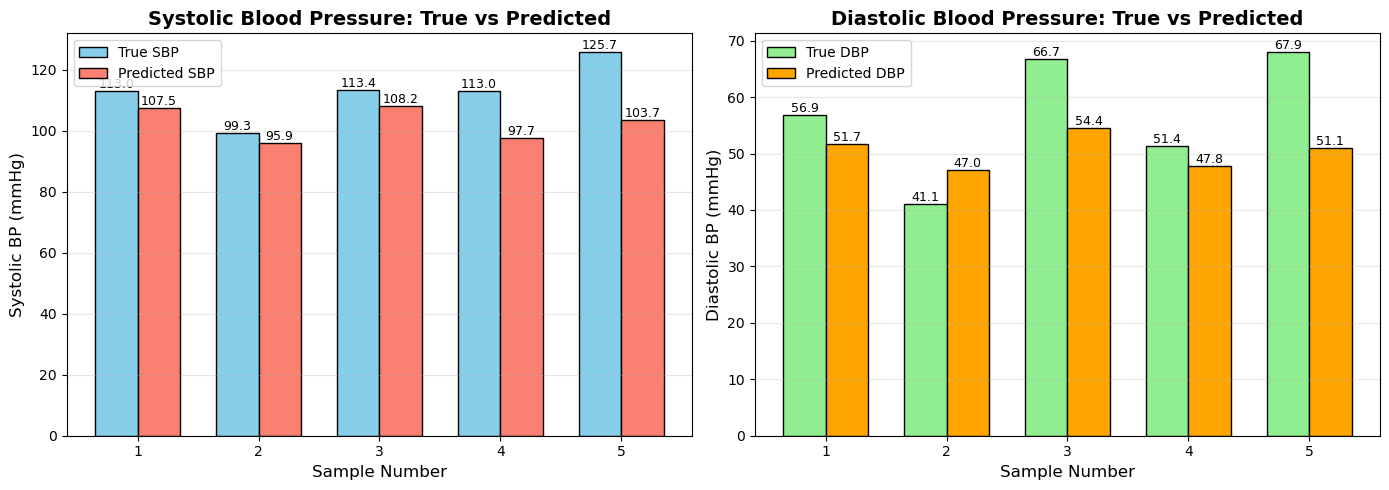


                        VISUALIZING SIGNAL FROM SAMPLE 1                        


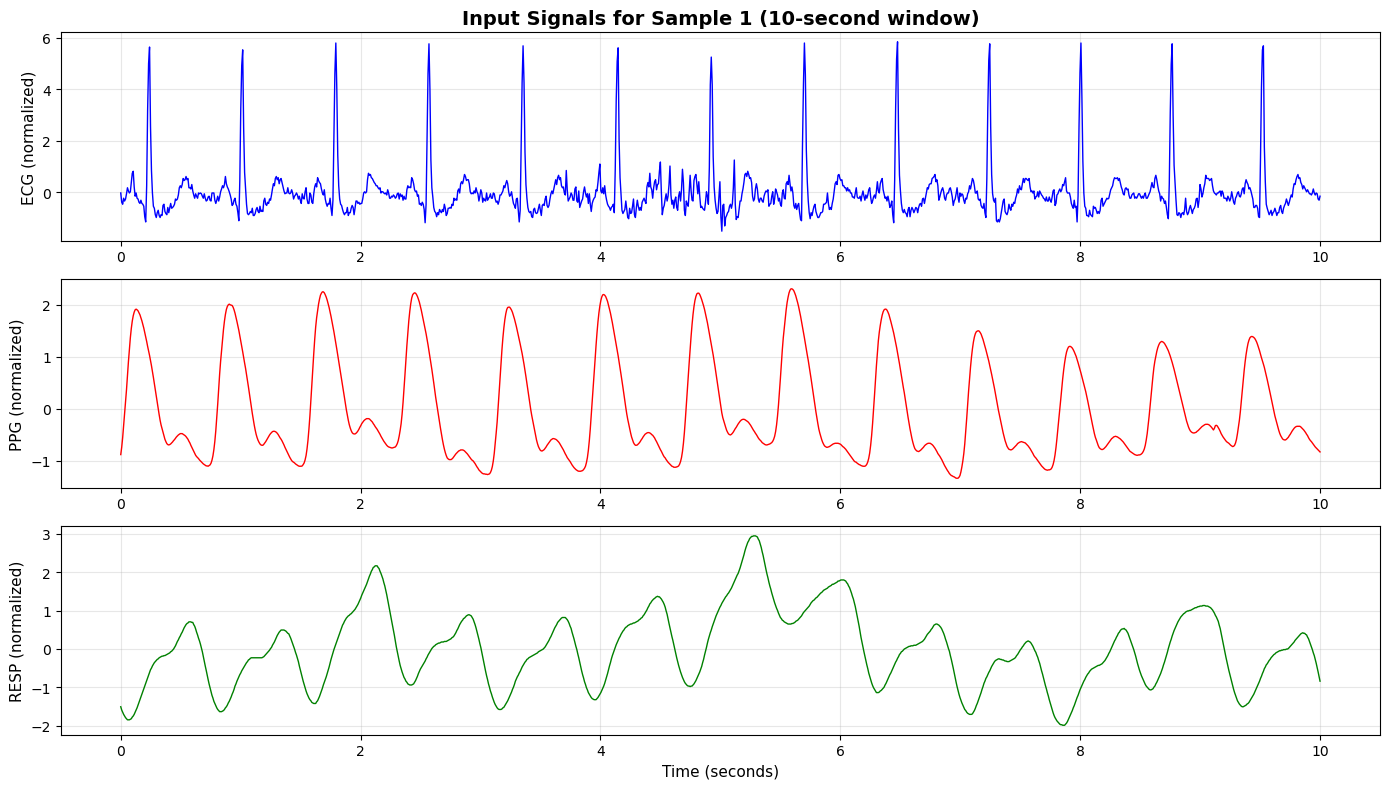


For this sample:
  True SBP/DBP: 113.0 / 56.9 mmHg
  Predicted SBP/DBP: 107.5 / 51.7 mmHg
  Errors: -5.51 / -5.20 mmHg


In [ ]:
### Test Model with Sample Data
print("="*80)
print("TESTING MODEL WITH SAMPLE DATA".center(80))
print("="*80)

# Select a few random samples from the test set
num_samples = 5
sample_indices = np.random.choice(len(test_dataset), num_samples, replace=False)

print(f"\nTesting {num_samples} random samples from the test set...\n")

# Load the best model
model.eval()

# Process samples
results = []
for i, idx in enumerate(sample_indices):
    # Get sample
    signals, true_labels = test_dataset[idx]

    # Add batch dimension and move to device
    signals_batch = signals.unsqueeze(0).to(device)

    # Make prediction
    with torch.no_grad():
        prediction = model(signals_batch)

    # Convert to numpy
    pred = prediction.cpu().numpy()[0]
    true = true_labels.numpy()

    # Calculate errors
    error_sbp = pred[0] - true[0]
    error_dbp = pred[1] - true[1]

    results.append({
        'sample': i + 1,
        'true_sbp': true[0],
        'pred_sbp': pred[0],
        'error_sbp': error_sbp,
        'true_dbp': true[1],
        'pred_dbp': pred[1],
        'error_dbp': error_dbp
    })

    print(f"Sample {i+1}:")
    print(f"  Systolic BP:   True = {true[0]:6.1f} mmHg  |  Predicted = {pred[0]:6.1f} mmHg  |  Error = {error_sbp:+6.2f} mmHg")
    print(f"  Diastolic BP:  True = {true[1]:6.1f} mmHg  |  Predicted = {pred[1]:6.1f} mmHg  |  Error = {error_dbp:+6.2f} mmHg")
    print("-"*80)

# Calculate average errors for these samples
avg_error_sbp = np.mean([r['error_sbp'] for r in results])
avg_error_dbp = np.mean([r['error_dbp'] for r in results])
avg_abs_error_sbp = np.mean([abs(r['error_sbp']) for r in results])
avg_abs_error_dbp = np.mean([abs(r['error_dbp']) for r in results])

print(f"\nSample Statistics:")
print(f"  Mean Error SBP:     {avg_error_sbp:+6.2f} mmHg")
print(f"  Mean Error DBP:     {avg_error_dbp:+6.2f} mmHg")
print(f"  Mean Absolute Error SBP: {avg_abs_error_sbp:6.2f} mmHg")
print(f"  Mean Absolute Error DBP: {avg_abs_error_dbp:6.2f} mmHg")
print("="*80)

# Visualize the predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# SBP comparison
sample_nums = [r['sample'] for r in results]
true_sbp = [r['true_sbp'] for r in results]
pred_sbp = [r['pred_sbp'] for r in results]

x = np.arange(len(sample_nums))
width = 0.35

bars1 = ax1.bar(x - width/2, true_sbp, width, label='True SBP', color='skyblue', edgecolor='black')
bars2 = ax1.bar(x + width/2, pred_sbp, width, label='Predicted SBP', color='salmon', edgecolor='black')

ax1.set_xlabel('Sample Number', fontsize=12)
ax1.set_ylabel('Systolic BP (mmHg)', fontsize=12)
ax1.set_title('Systolic Blood Pressure: True vs Predicted', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(sample_nums)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# DBP comparison
true_dbp = [r['true_dbp'] for r in results]
pred_dbp = [r['pred_dbp'] for r in results]

bars3 = ax2.bar(x - width/2, true_dbp, width, label='True DBP', color='lightgreen', edgecolor='black')
bars4 = ax2.bar(x + width/2, pred_dbp, width, label='Predicted DBP', color='orange', edgecolor='black')

ax2.set_xlabel('Sample Number', fontsize=12)
ax2.set_ylabel('Diastolic BP (mmHg)', fontsize=12)
ax2.set_title('Diastolic Blood Pressure: True vs Predicted', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(sample_nums)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9)
for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Visualize one sample's signal
print("\n" + "="*80)
print("VISUALIZING SIGNAL FROM SAMPLE 1".center(80))
print("="*80)

# Get the first sample's signals
signals_sample, labels_sample = test_dataset[sample_indices[0]]
signals_np = signals_sample.numpy()

# Create time axis (10 seconds at 125 Hz)
time = np.linspace(0, 10, 1250)

# Plot the three signals
fig, axes = plt.subplots(3, 1, figsize=(14, 8))

# ECG
axes[0].plot(time, signals_np[0], linewidth=1, color='blue')
axes[0].set_ylabel('ECG (normalized)', fontsize=11)
axes[0].set_title('Input Signals for Sample 1 (10-second window)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# PPG
axes[1].plot(time, signals_np[1], linewidth=1, color='red')
axes[1].set_ylabel('PPG (normalized)', fontsize=11)
axes[1].grid(True, alpha=0.3)

# RESP
axes[2].plot(time, signals_np[2], linewidth=1, color='green')
axes[2].set_ylabel('RESP (normalized)', fontsize=11)
axes[2].set_xlabel('Time (seconds)', fontsize=11)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFor this sample:")
print(f"  True SBP/DBP: {results[0]['true_sbp']:.1f} / {results[0]['true_dbp']:.1f} mmHg")
print(f"  Predicted SBP/DBP: {results[0]['pred_sbp']:.1f} / {results[0]['pred_dbp']:.1f} mmHg")
print(f"  Errors: {results[0]['error_sbp']:+.2f} / {results[0]['error_dbp']:+.2f} mmHg")
print("="*80)